In [1]:
import pandas as pd
import numpy as np

### Read-in salary data and aggregate by team

In [3]:
sal_df = pd.read_csv('./modified/cleaned_normalized_salaries.csv')

In [4]:
sal_df

,season,team,lg,salary,player_id,normalized salary,salary_cap,2022 salary
0,1991,POR,NBA,395000,abdelal01,0.033274,11871000,25499592.0
1,1992,POR,NBA,494000,abdelal01,0.039520,12500000,26061180.0
2,1993,BOS,NBA,500000,abdelal01,0.035714,14000000,28354756.0
3,1994,BOS,NBA,805000,abdelal01,0.053048,15175000,29954782.0
4,1995,SAC,NBA,650000,abdelal01,0.040717,15964000,30651995.0
...,...,...,...,...,...,...,...,...
16940,2018,LAL,NBA,1312611,zubaciv01,0.013246,99093000,115455294.0
16941,2019,LAC,NBA,1544951,zubaciv01,0.015166,101869000,116573245.0
16942,2020,LAC,NBA,6481482,zubaciv01,0.059387,109140000,123384194.0
16943,2021,LAC,NBA,7000000,zubaciv01,0.064138,109140000,117838496.0


In [5]:
sal_df.isna().sum()

season               0
team                 0
lg                   0
salary               0
player_id            0
normalized salary    0
salary_cap           0
2022 salary          0
dtype: int64

In [6]:
tot_salaries = sal_df[sal_df.columns[:-2]].groupby(by=['season', 'team']).sum()
tot_salaries

salary  normalized salary
season team                              
1985   ATL     2874000           0.798333
       BKN     3992000           1.108889
       BOS     6134000           1.703889
       CHI     3974000           1.103889
       CLE     2880000           0.800000
...                ...                ...
2022   SAC   129677197           1.153568
       SAS   126163542           1.122312
       TOR   133867382           1.190843
       UTA   148193388           1.318282
       WAS   127041356           1.130120

[1071 rows x 2 columns]

In [7]:
df = tot_salaries.drop(columns = 'salary').reset_index().pivot(
        index = ['season'], 
        columns = "team",
        values = "normalized salary"
    ).reset_index()

<AxesSubplot:>

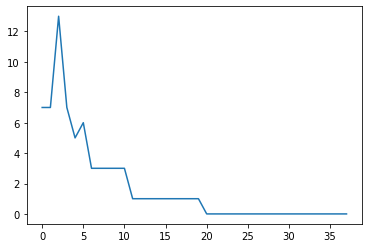

In [8]:
df.isnull().sum(axis=1).plot()

In [9]:
df.isna().sum(axis =1)

0      7
1      7
2     13
3      7
4      5
5      6
6      3
7      3
8      3
9      3
10     3
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
30     0
31     0
32     0
33     0
34     0
35     0
36     0
37     0
dtype: int64

In [11]:
df1 = df.set_index('season')

In [12]:
df1

team,ATL,BKN,BOS,CHA,CHI,CLE,DAL,DEN,DET,GSW,...,OKC,ORL,PHI,PHX,POR,SAC,SAS,TOR,UTA,WAS
season,,,,,,,,,,,,,,,,,,,,,
1985,0.798333,1.108889,1.703889,NaN,1.103889,0.800000,0.765278,0.850556,1.263611,0.484167,...,0.916667,NaN,1.559722,1.041944,0.684722,0.972222,0.901111,NaN,0.519722,0.765278
1986,0.867293,1.615993,1.549728,NaN,1.059768,0.926215,0.957322,0.809237,1.087566,1.031380,...,1.342625,NaN,1.612450,0.989724,0.905032,0.957241,0.957441,NaN,0.688519,1.035054
1987,0.722952,0.567846,0.490394,NaN,0.292720,0.121672,0.101112,0.015167,0.504685,NaN,...,NaN,NaN,0.244692,0.022245,NaN,NaN,0.062184,NaN,0.069767,0.030334
1988,1.068170,1.033828,1.506138,NaN,0.813486,0.694697,0.787725,0.956812,0.958063,0.835123,...,0.826736,NaN,1.005383,0.843949,0.842048,0.937054,0.794695,NaN,0.937703,1.028958
1989,1.020810,0.969994,1.172405,0.659569,0.958933,0.923258,0.775360,1.036403,1.041275,0.831444,...,0.862417,NaN,0.883135,0.885509,1.164201,0.844234,0.903761,NaN,0.761892,0.665192
1990,0.652928,0.346868,0.607019,0.336666,0.603448,0.316262,0.122424,0.540706,0.349929,0.737605,...,0.153030,NaN,0.479494,0.401959,0.922261,0.714140,0.612120,NaN,0.525403,0.255050
1991,0.990734,0.961166,0.948193,0.877517,0.845759,1.213293,0.985005,0.870609,1.087524,0.939264,...,0.892090,0.634487,0.980541,0.965631,0.944739,0.809115,0.931430,NaN,0.900935,0.809536
1992,1.034400,1.007840,2.027440,1.010000,1.346320,1.350560,1.040320,0.950320,1.214240,1.000000,...,1.064640,0.980000,1.124640,1.087440,1.019360,0.999360,0.926960,NaN,1.020880,1.010640
1993,1.288286,1.165286,1.801214,1.010714,1.324000,1.405429,0.775643,0.984013,0.996714,1.105214,...,1.002357,1.069286,1.240500,1.020000,1.169214,0.996643,1.291643,NaN,1.036929,1.232071


In [13]:
tot_count = sal_df[['season', 'team', 'salary']].groupby(by=['season', 'team']).count()
tot_count

salary
season team        
1985   ATL        9
       BKN        9
       BOS       11
       CHI       10
       CLE       10
...             ...
2022   SAC       22
       SAS       25
       TOR       24
       UTA       23
       WAS       25

[1071 rows x 1 columns]

In [15]:
df_t = tot_count.reset_index().pivot(
        index = ['season'], 
        columns = "team",
        values = "salary"
    ).reset_index().set_index('season')
df_t

team,ATL,BKN,BOS,CHA,CHI,CLE,DAL,DEN,DET,GSW,...,OKC,ORL,PHI,PHX,POR,SAC,SAS,TOR,UTA,WAS
season,,,,,,,,,,,,,,,,,,,,,
1985,9.0,9.0,11.0,NaN,10.0,10.0,9.0,9.0,12.0,6.0,...,7.0,NaN,11.0,11.0,6.0,11.0,9.0,NaN,8.0,8.0
1986,13.0,13.0,12.0,NaN,13.0,14.0,12.0,12.0,12.0,13.0,...,13.0,NaN,13.0,14.0,12.0,12.0,13.0,NaN,12.0,13.0
1987,5.0,5.0,3.0,NaN,2.0,2.0,1.0,1.0,6.0,NaN,...,NaN,NaN,2.0,1.0,NaN,NaN,1.0,NaN,1.0,1.0
1988,13.0,16.0,13.0,NaN,12.0,13.0,12.0,13.0,12.0,14.0,...,12.0,NaN,14.0,15.0,14.0,13.0,14.0,NaN,12.0,13.0
1989,14.0,13.0,13.0,14.0,12.0,13.0,12.0,15.0,13.0,12.0,...,12.0,NaN,12.0,14.0,15.0,13.0,14.0,NaN,12.0,12.0
1990,3.0,3.0,3.0,3.0,4.0,3.0,1.0,3.0,2.0,4.0,...,1.0,NaN,2.0,2.0,6.0,3.0,3.0,NaN,4.0,2.0
1991,13.0,14.0,15.0,13.0,12.0,15.0,14.0,12.0,14.0,13.0,...,13.0,12.0,13.0,14.0,12.0,13.0,13.0,NaN,13.0,13.0
1992,13.0,13.0,17.0,12.0,15.0,15.0,15.0,15.0,14.0,13.0,...,14.0,12.0,17.0,15.0,15.0,14.0,16.0,NaN,15.0,16.0
1993,14.0,15.0,21.0,14.0,15.0,14.0,17.0,15.0,12.0,15.0,...,14.0,17.0,15.0,16.0,12.0,14.0,16.0,NaN,14.0,18.0


### Read-in ELO data, correct team names, and aggregate by team

In [18]:
elo_raw = pd.read_csv('./modified/Elo_ratings_with_Champs.csv')
elo = elo_raw[elo_raw['season']>=1985]

In [19]:
elo['team'].unique()

array(['CLE', 'GSW', 'NJN', 'UTA', 'CHI', 'SEA', 'DET', 'BOS', 'WSB',
       'ATL', 'PHO', 'PHI', 'DAL', 'DEN', 'POR', 'IND', 'MIL', 'NYK',
       'LAL', 'KCK', 'HOU', 'SAS', 'LAC', 'SAC', 'CHH', 'MIA', 'MIN',
       'ORL', 'VAN', 'TOR', 'WAS', 'MEM', 'NOP', 'CHO', 'NOK', 'OKC',
       'BRK'], dtype=object)

Next, we have to check that all team accroymns are set to the current 30 names:

    CHH is the older version of CHA.
    CHO is the same as CHA (BBR saves it as CHO instead of CHA)
    NOH is the older version of NOP.
    NOK is the older version of NOP during katrina.
    NJN is an older version of BKN (1977-2012).
    NYN is an older version of BKN (1968-77)
    BRK is the same as BKN. (BBR saves it as BRK instead of BKN)
    WSB is the older version of WAS.
    PHO is same as PHX. (BBR saves it as PHO)
    KCK is the older version of SAC.
    VAN is the older version of MEM.
    NOJ is the older version of UTA (1974-1979).
    BUF is an older version of LAC (1970-1978).
    SDC is an older version of LAC (1978-1984).

In [20]:
def fix_team_abrs(data, team_col = "team"):
    
    for i in range(data.shape[0]):
        # Aggregate Charlotte
        if data[team_col].values[i] in {"CHH", "CHO"}:
            data[team_col].values[i] = "CHA"
        # Aggregate New Orleans
        elif data[team_col].values[i] in {"NOH", "NOK"}:
            data[team_col].values[i] = "NOP"
        # Aggregate Brooklyn Nets
        elif data[team_col].values[i] in {"BRK", "NJN", "NYN"}:
            data[team_col].values[i] = "BKN"
        # Washington
        elif data[team_col].values[i] == "WSB":
            data[team_col].values[i] = "WAS"
        # Phoenix
        elif data[team_col].values[i] == "PHO":
            data[team_col].values[i] = "PHX"
        # Seattle -> OKC
        elif data[team_col].values[i] == "SEA":
            data[team_col].values[i] = "OKC"
        # Memphis Grizzlies
        elif data[team_col].values[i] == "VAN":
            data[team_col].values[i] = "MEM"
        # Kings
        elif data[team_col].values[i] == "KCK":
            data[team_col].values[i] = "SAC"
        # Utah Jazz
        elif data[team_col].values[i] == "NOJ":
            data[team_col].values[i] = "UTA"
        # Clippers
        elif data[team_col].values[i] in {'BUF','SDC'}:
            data[team_col].values[i] = "LAC"
        # Utah Jazz
    return data

In [21]:
elo = fix_team_abrs(elo)
assert len(np.sort(elo.team.unique())) == 30, "failed"

In [22]:
df2 = elo.drop(columns = 'winner').pivot(
        index = ['season'], 
        columns = "team",
#         values = ["Mean", "Median"]
    ).reset_index()

In [23]:
df2 = df2.set_index('season')

CHA has missing values because it started in 1988. In 2002, that team became the New Orleans Hornets (now NOP). In 2004, the Charlotte Bobcats were founded (present-day CHA). In 2014, the Charlotte Bobcats changed their name back to the Hornets after the New Orleans Hornets renamed themselves to the Pelicans in 2013. Once the Bobcasts changed their name, they reclaimed the history and records of the 1988-2002 Hornets. As such, it appears as missing values.
[\[1\]](https://en.wikipedia.org/wiki/Charlotte_Hornets)

In [24]:
df2['Pre-Season']

team,ATL,BKN,BOS,CHA,CHI,CLE,DAL,DEN,DET,GSW,...,OKC,ORL,PHI,PHX,POR,SAC,SAS,TOR,UTA,WAS
season,,,,,,,,,,,,,,,,,,,,,
1985,1507.908400,1562.467800,1643.876100,NaN,1377.230200,1406.959000,1498.724200,1500.173300,1574.742600,1453.050200,...,1501.959600,NaN,1555.193100,1537.441800,1507.237500,1469.172600,1482.167200,NaN,1492.964400,1455.049000
1986,1477.677400,1516.845700,1639.903800,NaN,1460.816200,1520.075700,1513.958500,1582.999000,1556.641700,1382.868400,...,1369.497800,NaN,1596.447800,1436.463600,1556.243000,1455.480200,1503.918200,NaN,1524.465100,1487.805800
1987,1567.927200,1470.326900,1726.804700,NaN,1436.948700,1443.237500,1547.280500,1514.608400,1532.892900,1447.673500,...,1451.386500,NaN,1590.313700,1444.352300,1482.138900,1461.196000,1414.760000,NaN,1508.725300,1478.170200
1988,1616.046600,1412.377100,1620.626800,NaN,1519.830400,1446.833100,1564.529100,1489.887100,1619.418600,1483.450300,...,1508.893100,NaN,1524.104200,1474.803100,1519.538300,1445.088600,1414.671400,NaN,1483.296600,1478.361800
1989,1566.669200,1375.520000,1590.025000,1300.000000,1559.071500,1553.584700,1583.834800,1561.926300,1642.414400,1339.028600,...,1533.631600,NaN,1469.076700,1423.226700,1564.878100,1398.493500,1400.853000,NaN,1584.158800,1509.979600
1990,1589.016200,1353.197100,1504.239100,1333.406400,1561.023700,1593.263700,1437.674300,1477.252300,1717.318200,1481.350500,...,1522.986700,1300.000000,1522.476800,1618.541700,1476.210700,1425.355600,1344.933600,NaN,1525.046400,1501.407000
1991,1529.659800,1282.872300,1552.955800,1354.648700,1609.724100,1536.949500,1512.745700,1479.231200,1663.249100,1437.677500,...,1492.925300,1282.543500,1550.991700,1616.888200,1602.623300,1352.012900,1603.315900,NaN,1561.004200,1415.856200
1992,1492.607700,1368.877400,1538.969600,1400.485400,1715.183700,1453.535200,1376.799400,1311.251100,1527.372400,1528.676800,...,1523.851700,1454.120200,1503.031500,1562.238900,1635.667400,1385.087000,1564.160900,NaN,1583.811200,1391.101300
1993,1469.584500,1497.237300,1600.967800,1407.591700,1697.626700,1623.153200,1330.337800,1313.328500,1527.541700,1565.424200,...,1561.507100,1361.407200,1440.633900,1593.382600,1638.105000,1422.557500,1502.958300,NaN,1606.443100,1380.537600


<AxesSubplot:xlabel='season'>

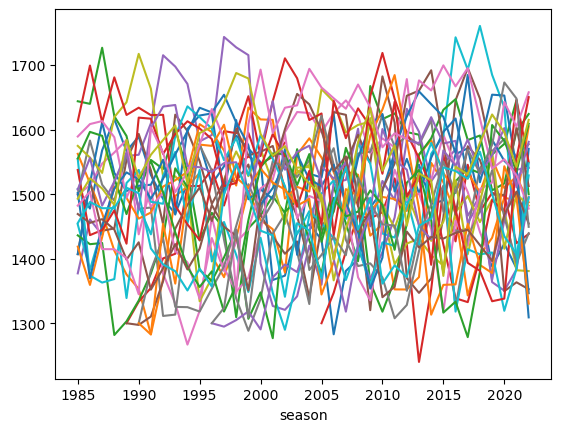

In [37]:
df2['Pre-Season'].plot(legend=False)

In [55]:
df2.reset_index()

season   Pre-Season                                                      \
team                 ATL          BKN          BOS          CHA          CHI   
0      1985  1507.908400  1562.467800  1643.876100          NaN  1377.230200   
1      1986  1477.677400  1516.845700  1639.903800          NaN  1460.816200   
2      1987  1567.927200  1470.326900  1726.804700          NaN  1436.948700   
3      1988  1616.046600  1412.377100  1620.626800          NaN  1519.830400   
4      1989  1566.669200  1375.520000  1590.025000  1300.000000  1559.071500   
5      1990  1589.016200  1353.197100  1504.239100  1333.406400  1561.023700   
6      1991  1529.659800  1282.872300  1552.955800  1354.648700  1609.724100   
7      1992  1492.607700  1368.877400  1538.969600  1400.485400  1715.183700   
8      1993  1469.584500  1497.237300  1600.967800  1407.591700  1697.626700   
9      1994  1517.095800  1511.753200  1534.325200  1512.831800  1670.760900   
10     1995  1578.768200  1532.801600  1428.163600  1512.462900  1581.678200   
11     1996  1515.646900  1404.051600  1471.020300  1538.456400  1591.580800   
12     1997  1543.140300  1371.351800  1446.146500  1482.322300  1743.522600   
13     1998  1590.490400  1432.282500  1309.338700  1543.941200  1727.385600   
14     1999  1570.676400  1505.744900  1447.130700  1558.319300  1715.352800   
15     2000  1549.583900  1459.849200  1466.982300  1547.155800  1392.728400   
16     2001  1366.968500  1445.617900  1496.919600  1557.864300  1326.750100   
17     2002  1373.703500  1378.445800  1470.792500  1579.619600  1320.720900   
18     2003  1441.124000  1561.351000  1569.652200          NaN  1341.665800   
19     2004  1453.040800  1586.418300  1481.457500          NaN  1420.490000   
20     2005  1429.643700  1556.715200  1436.303100  1300.000000  1359.593300   
21     2006  1282.850600  1519.851300  1511.585200  1347.206700  1518.292200   
22     2007  1381.049600  1535.021000  1454.483600  1411.126800  1521.964600   
23     2008  1398.861200  1530.044900  1396.036400  1466.285200  1601.294100   
24     2009  1479.320100  1435.724700  1667.496300  1462.346900  1450.129900   
25     2010  1505.211900  1453.614100  1616.200000  1471.932400  1520.413700   
26     2011  1564.225600  1352.395100  1625.099400  1524.362800  1491.017200   
27     2012  1488.392600  1352.260100  1596.147200  1422.464500  1632.174200   
28     2013  1545.638100  1371.431000  1592.053200  1240.037200  1596.741700   
29     2014  1484.994900  1548.436500  1484.961500  1352.420500  1519.912400   
30     2015  1490.114700  1518.266600  1378.546400  1511.003100  1547.218500   
31     2016  1561.843550  1469.552900  1519.678625  1426.797875  1569.533975   
32     2017  1571.053531  1342.985098  1540.320800  1545.519783  1466.563037   
33     2018  1486.280704  1405.034022  1532.470014  1473.216401  1496.578641   
34     2019  1388.023047  1432.381866  1561.524193  1501.955313  1363.674266   
35     2020  1423.202271  1494.767592  1577.783552  1497.243026  1350.430528   
36     2021  1385.050265  1489.190285  1645.596807  1424.016258  1383.306729   
37     2022  1570.150094  1605.053732  1499.792561  1438.333792  1495.430593   

                                                          ...          Max  \
team          CLE          DAL          DEN          DET  ...          OKC   
0     1406.959000  1498.724200  1500.173300  1574.742600  ...  1450.124250   
1     1520.075700  1513.958500  1582.999000  1556.641700  ...  1427.829450   
2     1443.237500  1547.280500  1514.608400  1532.892900  ...  1495.106950   
3     1446.833100  1564.529100  1489.887100  1619.418600  ...  1521.296150   
4     1553.584700  1583.834800  1561.926300  1642.414400  ...  1537.598900   
5     1593.263700  1437.674300  1477.252300  1717.318200  ...  1494.430800   
6     1536.949500  1512.745700  1479.231200  1663.249100  ...  1492.868900   
7     1453.535200  1376.799400  1311.251100  1527.372400  ...  1531.360100   
8     1623.153200  1330.

In [35]:
import matplotlib.pyplot as plt
plt.style.use('default')

(0.0, 2500.0)

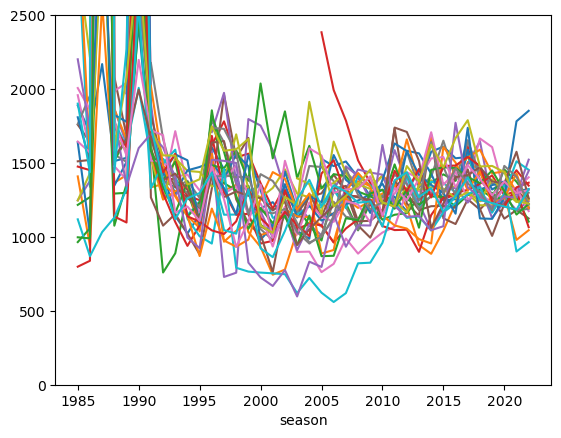

In [50]:
(df2['Pre-Season'] / df1).plot(legend=False)
# plt.xlim(2000)
plt.ylim(0,2500)

In [25]:
elo.columns

Index(['season', 'team', 'Pre-Season', 'Post-Reg_Season', 'Mean', 'Median',
       'Min', 'Max', 'winner'],
      dtype='object')

<AxesSubplot:xlabel='season'>

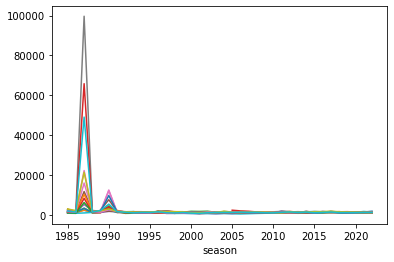

In [26]:
(df2['Post-Reg_Season'] / df1).plot(legend=False)

### Compare player counts by season

In [120]:
players = pd.read_csv('../Data/PlayerPerGameData.csv')
# players = players.replace('1986-1977', '1986-1987')
players = players.rename(columns = {'Tm':'team', "Season":"season",'Player-additional': 'player_id'})
players = fix_team_abrs(players, 'team')
for i in range(players.shape[0]):
    players["season"].values[i] = players["season"].iloc[i].split("-")[1]
players["season"] = pd.to_numeric(players["season"])
players['season'].unique()

array([1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019, 2020, 2021, 2022])

In [122]:
df_sub = players[['season', 'player_id', 'team']]
df_sort = df_sub.sort_values(by = ['team', 'season'])
# df_list = pd.DataFrame(df_sort.groupby(['Team', 'Season'])['Player'].apply(list))
df_sort.groupby(['team', 'season']).count()#.pivot(columns = 'Season')

player_id
team season           
ATL  1985           18
     1986           16
     1987           15
     1988           15
     1989           13
...                ...
WAS  2018           15
     2019           25
     2020           23
     2021           21
     2022           29

[1118 rows x 1 columns]

In [127]:
exp_tot_cnt = (df_sort.groupby(['team', 'season'])
    .count().reset_index() 
    .pivot(
        index = ['season'], 
        columns = "team",
#         values = ["Mean", "Median"])
    )
)['player_id']

Number of players by team/season that we have pergame data for:

In [131]:
exp_tot_cnt

team,ATL,BKN,BOS,CHA,CHI,CLE,DAL,DEN,DET,GSW,...,ORL,PHI,PHX,POR,SAC,SAS,TOR,TOT,UTA,WAS
season,,,,,,,,,,,,,,,,,,,,,
1985,18.0,17.0,13.0,NaN,14.0,19.0,12.0,12.0,17.0,13.0,...,NaN,14.0,15.0,12.0,16.0,17.0,NaN,20.0,15.0,15.0
1986,16.0,15.0,13.0,NaN,17.0,17.0,14.0,12.0,14.0,14.0,...,NaN,18.0,17.0,13.0,14.0,18.0,NaN,25.0,14.0,19.0
1987,15.0,17.0,16.0,NaN,17.0,15.0,13.0,14.0,15.0,14.0,...,NaN,16.0,14.0,17.0,15.0,17.0,NaN,21.0,12.0,15.0
1988,15.0,20.0,16.0,NaN,15.0,17.0,12.0,16.0,15.0,21.0,...,NaN,18.0,19.0,16.0,16.0,19.0,NaN,46.0,15.0,13.0
1989,13.0,15.0,17.0,16.0,16.0,12.0,16.0,16.0,17.0,17.0,...,NaN,16.0,17.0,17.0,17.0,22.0,NaN,42.0,15.0,13.0
1990,18.0,19.0,13.0,20.0,14.0,17.0,15.0,14.0,14.0,18.0,...,14.0,16.0,16.0,13.0,16.0,16.0,NaN,38.0,15.0,13.0
1991,14.0,16.0,15.0,17.0,12.0,16.0,15.0,21.0,14.0,18.0,...,14.0,18.0,16.0,13.0,18.0,17.0,NaN,26.0,15.0,15.0
1992,15.0,13.0,18.0,18.0,16.0,16.0,17.0,15.0,14.0,19.0,...,17.0,16.0,13.0,14.0,16.0,20.0,NaN,33.0,14.0,16.0
1993,17.0,18.0,17.0,15.0,17.0,14.0,18.0,14.0,16.0,20.0,...,16.0,14.0,15.0,14.0,16.0,16.0,NaN,28.0,15.0,19.0


Number of players per team, season that we have salary data for.

In [118]:
df_t

team,ATL,BKN,BOS,CHA,CHI,CLE,DAL,DEN,DET,GSW,...,OKC,ORL,PHI,PHX,POR,SAC,SAS,TOR,UTA,WAS
season,,,,,,,,,,,,,,,,,,,,,
1985,9.0,9.0,11.0,NaN,10.0,10.0,9.0,9.0,12.0,6.0,...,7.0,NaN,11.0,11.0,6.0,11.0,9.0,NaN,8.0,8.0
1986,13.0,13.0,12.0,NaN,13.0,14.0,12.0,12.0,12.0,13.0,...,13.0,NaN,13.0,14.0,12.0,12.0,13.0,NaN,12.0,13.0
1987,5.0,5.0,3.0,NaN,2.0,2.0,1.0,1.0,6.0,NaN,...,NaN,NaN,2.0,1.0,NaN,NaN,1.0,NaN,1.0,1.0
1988,13.0,16.0,13.0,NaN,12.0,13.0,12.0,13.0,12.0,14.0,...,12.0,NaN,14.0,15.0,14.0,13.0,14.0,NaN,12.0,13.0
1989,14.0,13.0,13.0,14.0,12.0,13.0,12.0,15.0,13.0,12.0,...,12.0,NaN,12.0,14.0,15.0,13.0,14.0,NaN,12.0,12.0
1990,3.0,3.0,3.0,3.0,4.0,3.0,1.0,3.0,2.0,4.0,...,1.0,NaN,2.0,2.0,6.0,3.0,3.0,NaN,4.0,2.0
1991,13.0,14.0,15.0,13.0,12.0,15.0,14.0,12.0,14.0,13.0,...,13.0,12.0,13.0,14.0,12.0,13.0,13.0,NaN,13.0,13.0
1992,13.0,13.0,17.0,12.0,15.0,15.0,15.0,15.0,14.0,13.0,...,14.0,12.0,17.0,15.0,15.0,14.0,16.0,NaN,15.0,16.0
1993,14.0,15.0,21.0,14.0,15.0,14.0,17.0,15.0,12.0,15.0,...,14.0,17.0,15.0,16.0,12.0,14.0,16.0,NaN,14.0,18.0


Some teams have stats for more players than expected -> missing salary data.
Some teams more players with salaries than with stats -> injured players or people without much playing time (cut midseason, etc)

In [132]:
exp_tot_cnt - df_t

team,ATL,BKN,BOS,CHA,CHI,CLE,DAL,DEN,DET,GSW,...,ORL,PHI,PHX,POR,SAC,SAS,TOR,TOT,UTA,WAS
season,,,,,,,,,,,,,,,,,,,,,
1985,9.0,8.0,2.0,NaN,4.0,9.0,3.0,3.0,5.0,7.0,...,NaN,3.0,4.0,6.0,5.0,8.0,NaN,NaN,7.0,7.0
1986,3.0,2.0,1.0,NaN,4.0,3.0,2.0,0.0,2.0,1.0,...,NaN,5.0,3.0,1.0,2.0,5.0,NaN,NaN,2.0,6.0
1987,10.0,12.0,13.0,NaN,15.0,13.0,12.0,13.0,9.0,NaN,...,NaN,14.0,13.0,NaN,NaN,16.0,NaN,NaN,11.0,14.0
1988,2.0,4.0,3.0,NaN,3.0,4.0,0.0,3.0,3.0,7.0,...,NaN,4.0,4.0,2.0,3.0,5.0,NaN,NaN,3.0,0.0
1989,-1.0,2.0,4.0,2.0,4.0,-1.0,4.0,1.0,4.0,5.0,...,NaN,4.0,3.0,2.0,4.0,8.0,NaN,NaN,3.0,1.0
1990,15.0,16.0,10.0,17.0,10.0,14.0,14.0,11.0,12.0,14.0,...,NaN,14.0,14.0,7.0,13.0,13.0,NaN,NaN,11.0,11.0
1991,1.0,2.0,0.0,4.0,0.0,1.0,1.0,9.0,0.0,5.0,...,2.0,5.0,2.0,1.0,5.0,4.0,NaN,NaN,2.0,2.0
1992,2.0,0.0,1.0,6.0,1.0,1.0,2.0,0.0,0.0,6.0,...,5.0,-1.0,-2.0,-1.0,2.0,4.0,NaN,NaN,-1.0,0.0
1993,3.0,3.0,-4.0,1.0,2.0,0.0,1.0,-1.0,4.0,5.0,...,-1.0,-1.0,-1.0,2.0,2.0,0.0,NaN,NaN,1.0,1.0


### Comparing RAPTOR player count

In [ ]:
raptor = pd.rea